# Mouse brain marker genes dotplots

In [1]:
import sys, ast, os
import time
import pickle
import scanpy as sc
import anndata
import pandas as pd
import numpy as np
import os
from plotnine import *
import matplotlib.pyplot as plt 
import matplotlib
import cell2location

from matplotlib import rcParams
rcParams['pdf.fonttype'] = 42 # enables correct plotting of text
import seaborn as sns

# scanpy prints a lot of warnings
import warnings
warnings.filterwarnings('ignore')

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
import sys
print(sys.executable)

/nfs/team283/vk7/software/miniconda3farm5/envs/cellpymcr3/bin/python


### Read snRNA-seq reference  <a class="anchor" id="read"></a>

In [3]:
adata = sc.read_h5ad('/nfs/team205/vk7/sanger_projects/cell2location_paper/notebooks/selected_results/mouse_viseum_snrna/regression_model/RegressionNBV2Torch_65covariates_40532cells_12819genes/sc_with_UMAP.h5ad')

## Preliminart plots - Plot markers used for annotation

In [4]:
anno_tab = pd.read_table("/nfs/team205/ed6/data/c2l_markers/annotationSession.tsv")
marker_tab = anno_tab[['cluster_newname', "marker_pos"]].drop_duplicates()

marker_tab['cluster_group']  = ['_'.join([i for i in x.split("_") if not i.isdigit()]) for x in marker_tab.cluster_newname]
marker_tab['cluster_group_broad'] = [x.split("_")[0]  for x in marker_tab.cluster_newname]

marker_tab = marker_tab.dropna()

marker_tab['marker_pos_ls'] = [marker_tab.iloc[x].marker_pos.split(", ") for x in range(marker_tab.shape[0])]

broad_cl_dict = {x:np.unique(sum(marker_tab[marker_tab.cluster_group_broad == x].marker_pos_ls.values, [])).tolist() for x in marker_tab.cluster_group_broad.unique()}
cl_dict = {x:np.unique(sum(marker_tab[marker_tab.cluster_group == x].marker_pos_ls.values, [])).tolist() for x in marker_tab.cluster_group.unique()}
## Remove markers not in adata.var
cl_dict = {k:list(set(x) & set(adata.var["SYMBOL"].tolist())) for k,x in cl_dict.items()}

In [7]:
cl_dict

{'Ext_ClauPyr': ['Synpr'],
 'Ext_L23': ['Cux2'],
 'Ext_L25': ['Cux2', 'Rorb', 'Thsd7a'],
 'Ext_L5': ['Bcl11b', 'Kcnk2'],
 'Ext_Amy': ['Kcng1', 'Lypd1', 'Ndst4'],
 'Ext_L56': ['Foxp2', 'Bcl11b'],
 'Ext_L6B': ['Foxp2', 'Nr4a2'],
 'Ext_Hpc': ['Ahcyl2', 'Neurod6', 'Nr3c2'],
 'Ext_L6': ['Sox5', 'Dkk3'],
 'Ext_Med': ['Htr2c', 'Cux1'],
 'Ext_Thal': ['Ptpn4', 'Ptpn3'],
 'Inh': ['Slc7a14',
  'Gad1',
  'Slc32a1',
  'Syt9',
  'Nwd2',
  'Lrrc55',
  'Syt2',
  'Esrrg'],
 'Inh_Lamp5': ['Lamp5'],
 'Inh_Meis2': ['Drd1', 'Foxp2', 'Cux2', 'Rgs9', 'Nexn', 'Meis2'],
 'Inh_Pvalb': ['Pvalb'],
 'Inh_Sst': ['Sst'],
 'Inh_Vip': ['Vip'],
 'Nb': ['Dcx', 'Pax6', 'Sox2'],
 'Unk': ['Angpt1', 'Reln'],
 'Astro': ['Dkk3', 'Agt'],
 'Endo': ['Flt1', 'Tek'],
 'Micro': ['Ptprc'],
 'Oligo': ['Cnksr3', 'Mog', 'Plp1'],
 'OPC': ['Bmp4', 'Plp1', 'Pdgfra']}

In [174]:
cat_order = ['Ext_ClauPyr',
 'Ext_L23',
 'Ext_L25',
 'Ext_L25',
 'Ext_L5_1',
 'Ext_Amy_1',
 'Ext_L5_2',
 'Ext_L5_3',
 'Ext_Amy_2',
 'Ext_L56',
 'Ext_L6B',
             'Ext_Pir',
             'Ext_Hpc_CA1', 'Ext_Hpc_CA2', 'Ext_Hpc_CA3', 'Ext_Hpc_DG1', 'Ext_Hpc_DG2',
 'Ext_L6',
 'Ext_Med',
 'Ext_Thal_1',
 'Ext_Thal_2',
             'Ext_Unk_1', 'Ext_Unk_2', 'Ext_Unk_3',
 'Inh_1',
 'Inh_2',
 'Inh_3',
 'Inh_4',
 'Inh_5',
 'Inh_6',
 'Inh_Lamp5',
 'Inh_Meis2_1',
 'Inh_Meis2_2',
 'Inh_Meis2_3',
'Inh_Meis2_4',
 'Inh_Pvalb',
 'Inh_Sst',
 'Inh_Vip',
 'Nb_1',
 'Nb_2',
             'Unk_1',
 'Unk_2',
 'Astro_AMY',
 'Astro_AMY_CTX',
 'Astro_CTX',
 'Astro_HPC',
 'Astro_HYPO',
 'Astro_STR',
 'Astro_THAL_hab',
 'Astro_THAL_lat',
 'Astro_THAL_med',
 'Astro_WM',
 'Endo',
 'Micro',
 'Oligo_1',
 'Oligo_2',
 'OPC_1',
 'OPC_2',
            'LowQ_1', 'LowQ_2',
            ]


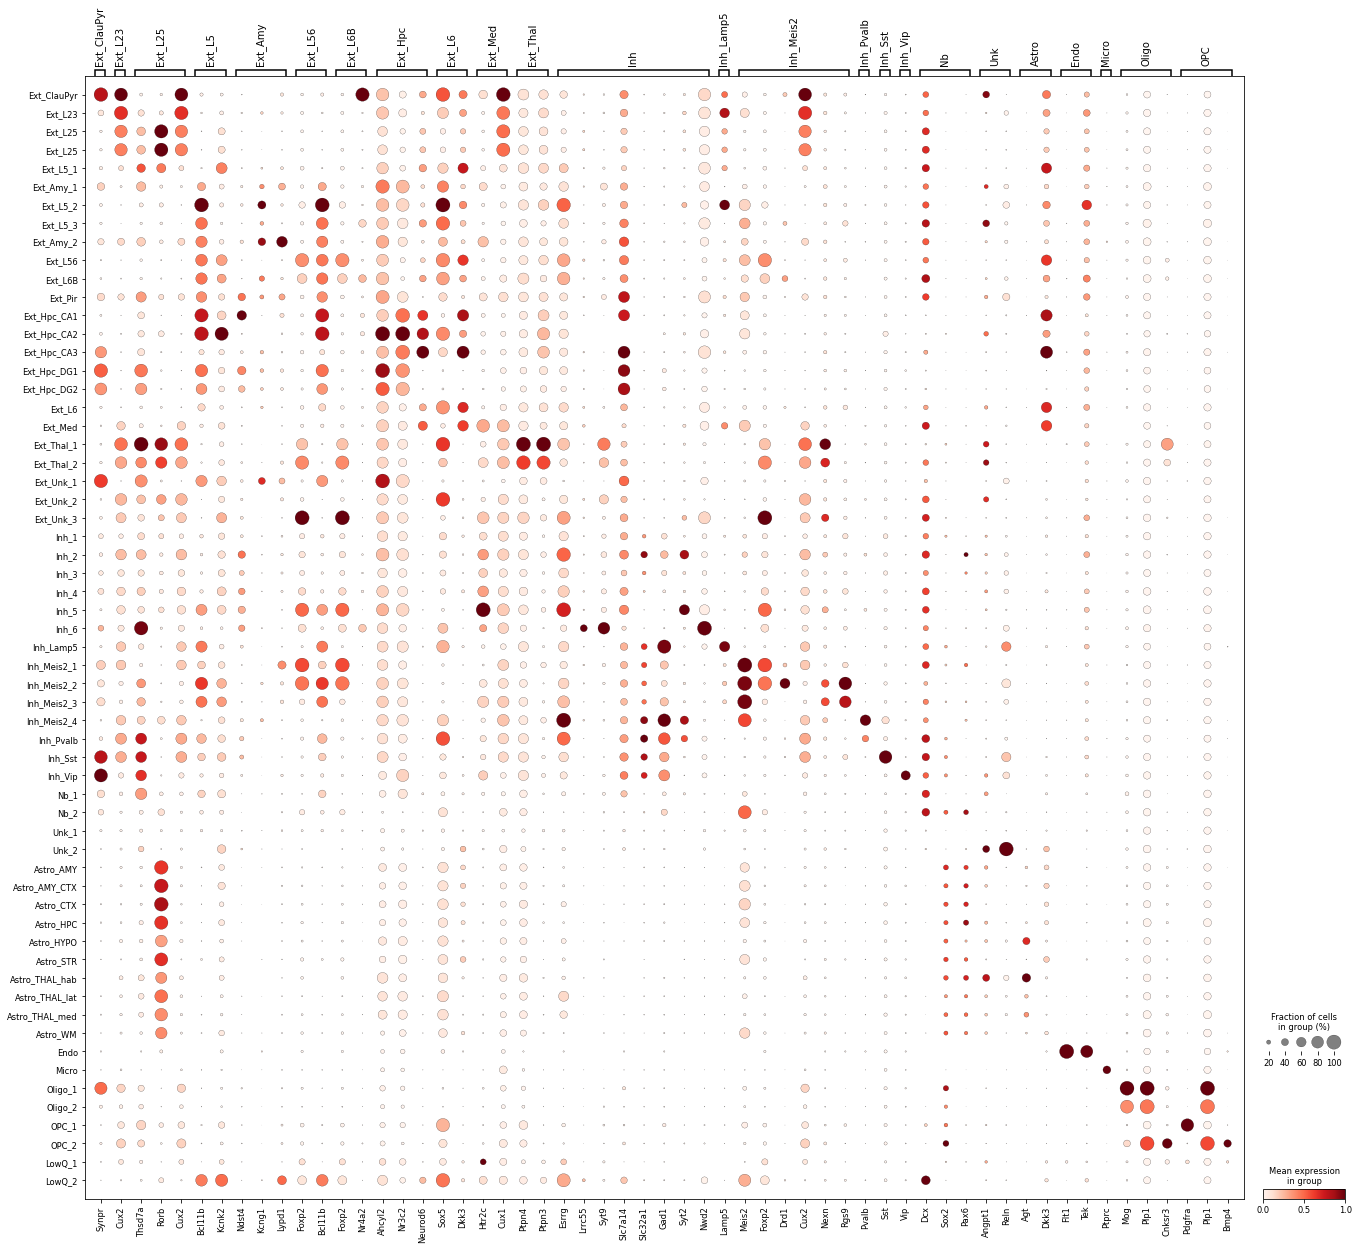

In [175]:
sc.pl.dotplot(adata, cl_dict, groupby="annotation_1", gene_symbols="SYMBOL", standard_scale="var", 
              categories_order=cat_order
             )

Removing the astrocytes

In [568]:
adata_noastro = adata[adata.obs.annotation_1.isin([x for x in adata.obs.annotation_1.unique() if "Astro" not in x])]

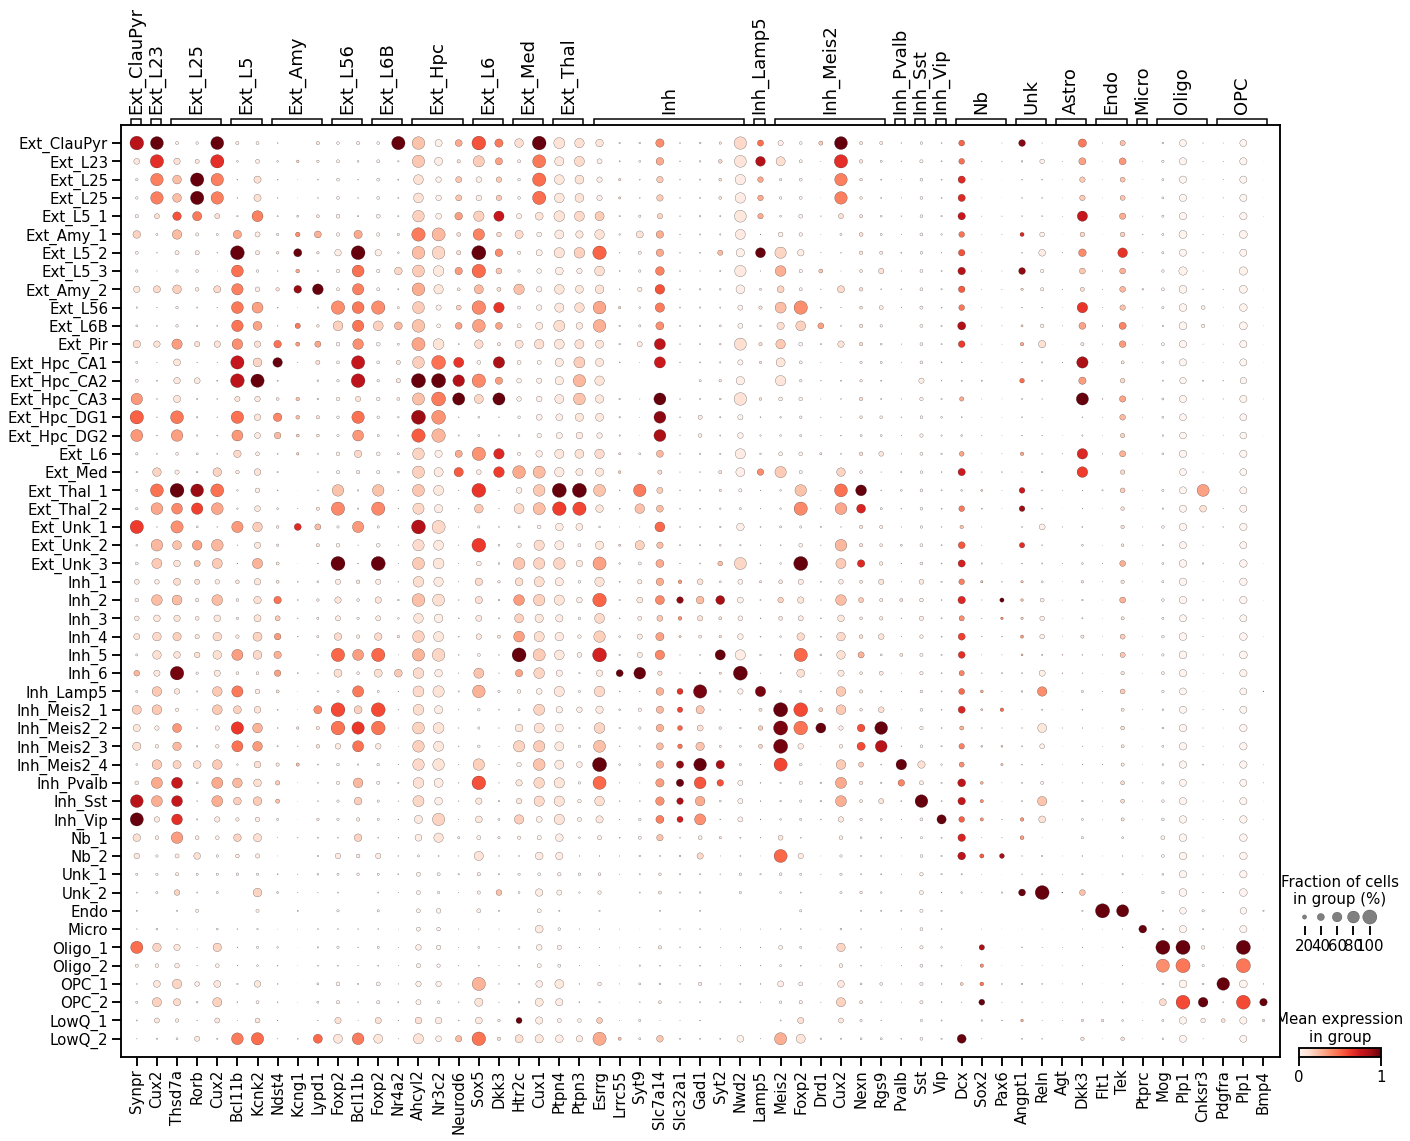

In [192]:
sns.set_context("talk")
sc.pl.dotplot(adata_noastro, cl_dict, groupby="annotation_1", gene_symbols="SYMBOL", standard_scale="var",
              categories_order=[x for x in cat_order if "Astro" not in x]
             )

### Regional markers

From mousebrain.org (Zeisel)

In [199]:
reg_markers_df = pd.read_csv("/nfs/team205/ed6/data/c2l_markers/zeisel_reg_markers.csv", index_col=0)

In [415]:
def pick_markers(pattern1, pattern2):
    markers_df = reg_markers_df[reg_markers_df.Description.isin(np.unique([x for x in reg_markers_df.Description if pattern1 in x and pattern2 in x]).tolist())]
    markers_df = markers_df[markers_df.MarkerGenes.isin(adata.var.SYMBOL)]
#     return(markers_df)
#     markers_df.
    return(markers_df.MarkerGenes.unique().tolist())

In [562]:
exc_markers_dict = {k:pick_markers("Exc", k) for k in ["amygdala", "hippocampus CA1", "hippocampus CA3", "thalamus", "hypothalamus"]}
inh_markers_dict = {k:pick_markers("Inh", k) for k in ["hippocampus", "thalamus", "hypothalamus"]}
int_markers_dict = {k:pick_markers("int", k) for k in ["cortex/hippocampus", "hippocampus"]}
inh_markers_dict["hippocampus"].extend(int_markers_dict["hippocampus"])
inh_markers_dict["hippocampus"] = np.unique(inh_markers_dict["hippocampus"]).tolist()
inh_markers_dict["cortex/hippocampus"] = int_markers_dict["cortex/hippocampus"]

# from collections import Counter
# Counter(sum(inh_markers_dict.values(), []))
inh_markers_dict["hippocampus"] = [x for x in inh_markers_dict["hippocampus"] if x not in inh_markers_dict["cortex/hippocampus"]]

### Plot Excitatory neurons (non cortical)

In [563]:
exc_location  = anno_tab[["cluster_newname", "location"]][["Ext" in x for x in anno_tab.cluster_newname]]
exc_location['location'][(exc_location.cluster_newname == 'Ext_L5_3')] = "cortex"
exc_location = exc_location.sort_values("location")
exc_location = exc_location[["Ext_L" not in x for x in exc_location.cluster_newname]]

In [564]:
ext_order = ['Ext_Amy_2',
 'Ext_ClauPyr',
 'Ext_Amy_1',
 'Ext_Pir',
 'Ext_Med',
 'Ext_Hpc_CA1',
 'Ext_Hpc_CA2',
 'Ext_Hpc_CA3',
 'Ext_Hpc_DG1',
'Ext_Hpc_DG2',
 'Ext_Thal_1',
 'Ext_Thal_2',
 'Ext_Unk_1',
 'Ext_Unk_2',
 'Ext_Unk_3']

In [566]:
sns.set_context("talk")
fig = sc.pl.dotplot(adata[["Ext" in x and "Ext_L" not in x for x in adata.obs.annotation_1]], 
                    exc_markers_dict, 
                    groupby="annotation_1", 
              gene_symbols="SYMBOL", standard_scale="var",
            categories_order = ext_order,
              return_fig=True, show=True
             )

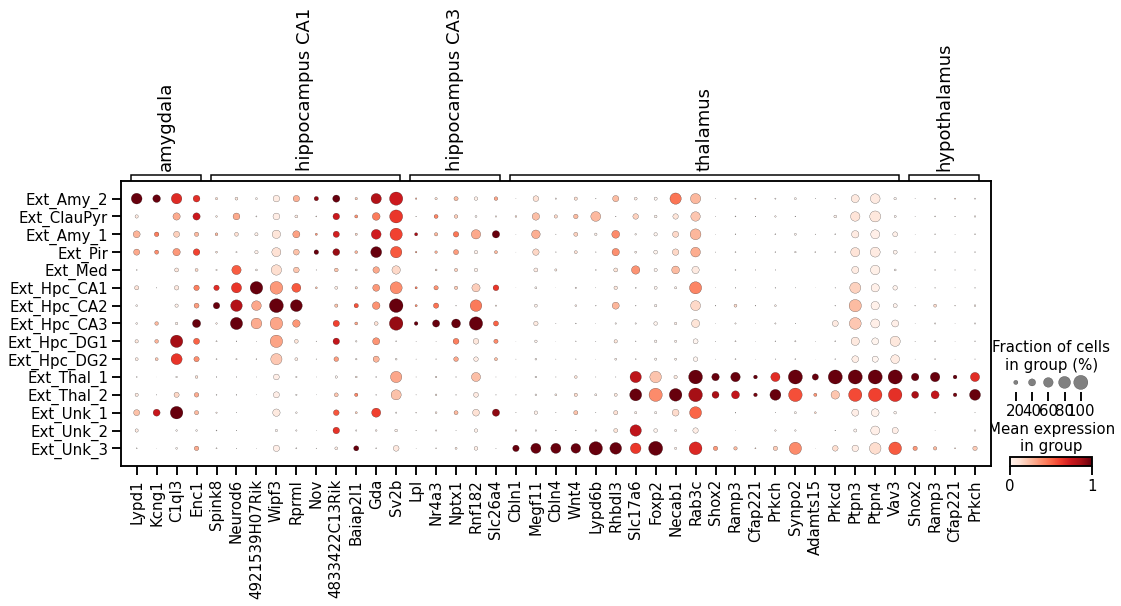

In [567]:
# fig.ax_dict["mainplot_ax"]
fig.show()

### Inhibitory neurons

In [439]:
inh_location  = anno_tab[["cluster_newname", "location"]][["Inh" in x for x in anno_tab.cluster_newname]]
inh_location.location = [x if x!= "striatum" else "thalamus" for x in inh_location.location]
inh_location.location = [x if x!= "cortex" else "cortex/hippocampus" for x in inh_location.location]
inh_location.location = [x if x!= "amygdala" else 'thalamus' for x in inh_location.location]
inh_location = inh_location.sort_values("location")
# inh_location = inh_location[inh_location.location != "amygdala"]

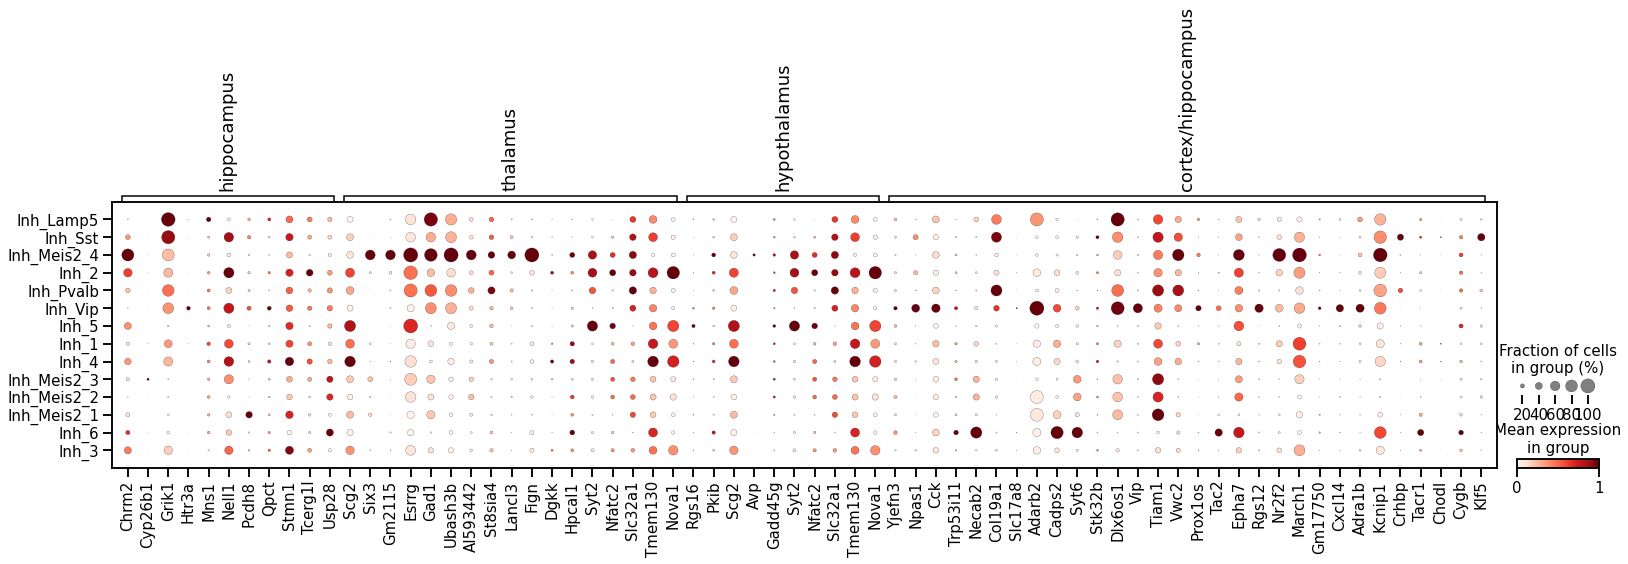

In [442]:
sns.set_context("talk")
sc.pl.dotplot(adata[["Inh" in x for x in adata.obs.annotation_1]],               
              inh_markers_dict, groupby="annotation_1", 
              categories_order = inh_location.cluster_newname.unique(), 
              gene_symbols="SYMBOL", standard_scale="var", 
             )

Refine markers (handpicking some decent ones)

In [448]:
for x in ["Rgs16", "Pkib", "Avp", "Gadd45g", 'Rmst', "Dgkk", "Hpcal1"]:
    inh_markers_dict["thalamus"].remove(x)
    
for x in ["Cyp26b1", "Htr3a", "Mns1", "Pcdh8", "Qpct", "Stmn1", "Tcerg1l", "Usp28"]:
    inh_markers_dict["hippocampus"].remove(x)

for x in ["Rgs16", "Pkib", "Avp","Scg2","Gadd45g", ]:
    inh_markers_dict["hypothalamus"].remove(x)

inh_markers_dict["cortex/hippocampus"] = ["Vip", "Dlx6os1", "Vwc2", "Epha7", "Nr2f2", "March1", "Kcnip1"]

All inhibitory neurons

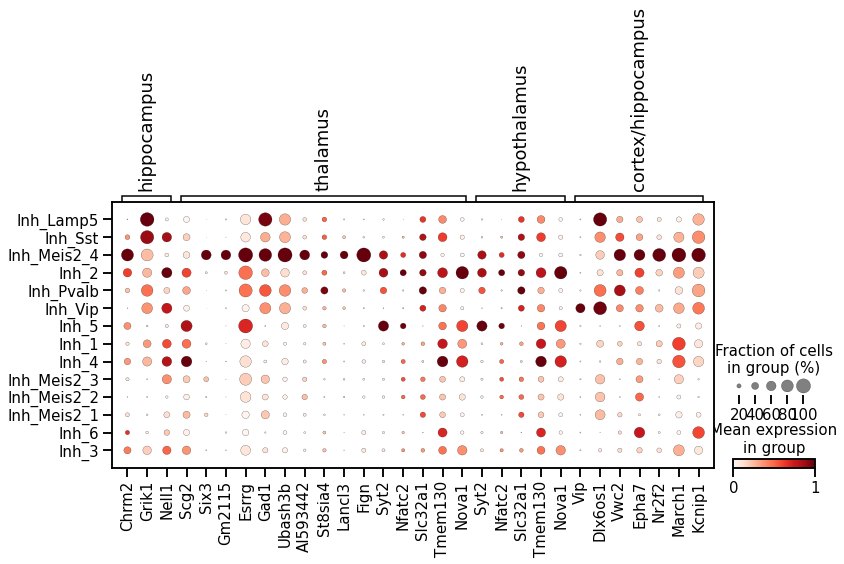

In [493]:
sns.set_context("talk")
sc.pl.dotplot(adata[["Inh" in x for x in adata.obs.annotation_1]],               
              inh_markers_dict, groupby="annotation_1", 
              categories_order = inh_location.cluster_newname.unique(), 
              gene_symbols="SYMBOL", standard_scale="var", 
             )

Group by location (some clusters appear twice)

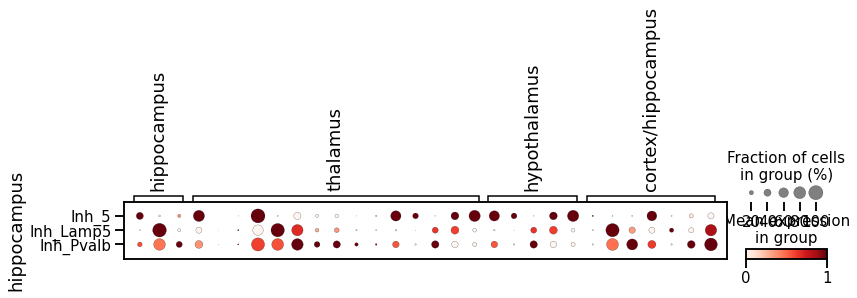

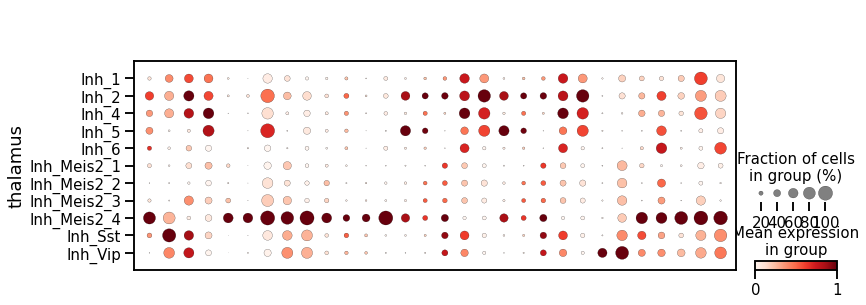

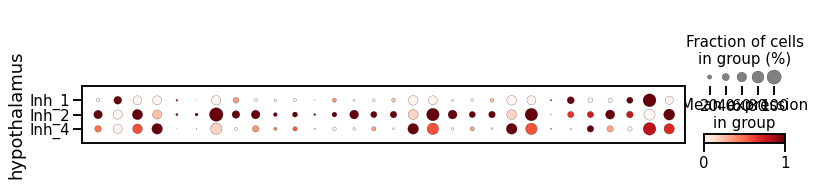

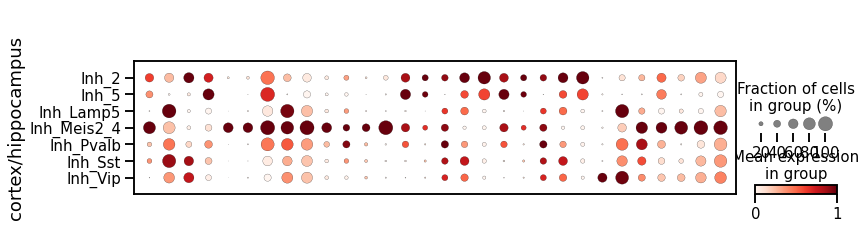

In [492]:
sns.set_context("talk")
location = "hippocampus"
small_adata = adata[adata.obs.annotation_1.isin(inh_location[inh_location.location==location].cluster_newname.tolist())]
dp = sc.pl.dotplot(small_adata,               
              inh_markers_dict, groupby="annotation_1", 
#               categories_order = inh_location.cluster_newname.unique(), 
              gene_symbols="SYMBOL", standard_scale="var",  
                   return_fig=True, show=False
             )
# dp.add_totals().style(dot_edge_color='black', dot_edge_lw=0.5).show()

axes_dict = dp.get_axes()
axes_dict["mainplot_ax"].set_ylabel(location);
axes_dict["mainplot_ax"].xaxis.set_ticks([]);

for location in ["thalamus", "hypothalamus", "cortex/hippocampus"]:
    small_adata = adata[adata.obs.annotation_1.isin(inh_location[inh_location.location==location].cluster_newname.tolist())]
    empty_dict = inh_markers_dict.copy()
    empty_dict.keys()
    dp = sc.pl.dotplot(small_adata,               
                  sum([v for k,v in empty_dict.items()], []), groupby="annotation_1", 
    #               categories_order = inh_location.cluster_newname.unique(), 
                  gene_symbols="SYMBOL", standard_scale="var",  var_group_labels=[""]*4,
                       return_fig=True, show=False
                 )
    # dp.add_totals().style(dot_edge_color='black', dot_edge_lw=0.5).show()

    axes_dict = dp.get_axes()
    axes_dict["mainplot_ax"].set_ylabel(location);
    axes_dict["mainplot_ax"].xaxis.set_ticks([]);
# dp.show()

## Fig S5

In [17]:
from typing import Optional, Union, Mapping  # Special
from typing import Sequence  # ABCs
from typing import Tuple  # Classes

import numpy as np
import pandas as pd
from anndata import AnnData
from matplotlib.axes import Axes
from matplotlib import pyplot as pl

from scanpy import logging as logg
from scanpy._utils import _doc_params
from scanpy._compat import Literal
from scanpy.plotting._utils import make_grid_spec, fix_kwds
from scanpy.plotting._utils import ColorLike, _AxesSubplot
from scanpy.plotting._utils import savefig_or_show
from scanpy._settings import settings

from scanpy.plotting._docs import doc_common_plot_args, doc_show_save_ax
from scanpy.plotting._baseplot_class import BasePlot, doc_common_groupby_plot_args, _VarNames


class DotPlot(BasePlot):
    """\
    Allows the visualization of two values that are encoded as
    dot size and color. The size usually represents the fraction
    of cells (obs) that have a non-zero value for genes (var).
    For each var_name and each `groupby` category a dot is plotted.
    Each dot represents two values: mean expression within each category
    (visualized by color) and fraction of cells expressing the `var_name` in the
    category (visualized by the size of the dot). If `groupby` is not given,
    the dotplot assumes that all data belongs to a single category.
    .. note::
       A gene is considered expressed if the expression value in the `adata` (or
       `adata.raw`) is above the specified threshold which is zero by default.
    An example of dotplot usage is to visualize, for multiple marker genes,
    the mean value and the percentage of cells expressing the gene
    across multiple clusters.
    Parameters
    ----------
    {common_plot_args}
    title
        Title for the figure
    expression_cutoff
        Expression cutoff that is used for binarizing the gene expression and
        determining the fraction of cells expressing given genes. A gene is
        expressed only if the expression value is greater than this threshold.
    mean_only_expressed
        If True, gene expression is averaged only over the cells
        expressing the given genes.
    standard_scale
        Whether or not to standardize that dimension between 0 and 1,
        meaning for each variable or group,
        subtract the minimum and divide each by its maximum.
    kwds
        Are passed to :func:`matplotlib.pyplot.scatter`.
    See also
    --------
    :func:`~scanpy.pl.dotplot`: Simpler way to call DotPlot but with less options.
    :func:`~scanpy.pl.rank_genes_groups_dotplot`: to plot marker
        genes identified using the :func:`~scanpy.tl.rank_genes_groups` function.
    Examples
    --------
    >>> import scanpy as sc
    >>> adata = sc.datasets.pbmc68k_reduced()
    >>> markers = ['C1QA', 'PSAP', 'CD79A', 'CD79B', 'CST3', 'LYZ']
    >>> sc.pl.DotPlot(adata, markers, groupby='bulk_labels').show()
    Using var_names as dict:
    >>> markers = {{'T-cell': 'CD3D', 'B-cell': 'CD79A', 'myeloid': 'CST3'}}
    >>> sc.pl.DotPlot(adata, markers, groupby='bulk_labels').show()
    """

    DEFAULT_SAVE_PREFIX = 'dotplot_'
    # default style parameters
    DEFAULT_COLORMAP = 'winter'
    DEFAULT_COLOR_ON = 'dot'
    DEFAULT_DOT_MAX = None
    DEFAULT_DOT_MIN = None
    DEFAULT_SMALLEST_DOT = 0.0
    DEFAULT_LARGEST_DOT = 200.0
    DEFAULT_DOT_EDGECOLOR = 'black'
    DEFAULT_DOT_EDGELW = 0.2
    DEFAULT_SIZE_EXPONENT = 1.5

    # default legend parameters
    DEFAULT_SIZE_LEGEND_TITLE = 'Fraction of cells\nin group (%)'
    DEFAULT_COLOR_LEGEND_TITLE = 'Mean expression\nin group'
    DEFAULT_LEGENDS_WIDTH = 1.5  # inches
    DEFAULT_PLOT_X_PADDING = 0.8  # a unit is the distance between two x-axis ticks
    DEFAULT_PLOT_Y_PADDING = 1.0  # a unit is the distance between two y-axis ticks

    def __init__(
        self,
        adata: AnnData,
        var_names: Union[_VarNames, Mapping[str, _VarNames]],
        groupby: Union[str, Sequence[str]],
        use_raw: Optional[bool] = None,
        log: bool = False,
        num_categories: int = 7,
        categories_order: Optional[Sequence[str]] = None,
        title: Optional[str] = None,
        figsize: Optional[Tuple[float, float]] = None,
        gene_symbols: Optional[str] = None,
        var_group_positions: Optional[Sequence[Tuple[int, int]]] = None,
        var_group_labels: Optional[Sequence[str]] = None,
        var_group_rotation: Optional[float] = None,
        layer: Optional[str] = None,
        expression_cutoff: float = 0.0,
        mean_only_expressed: bool = False,
        standard_scale: Literal['var', 'group'] = None,
        dot_color_df: Optional[pd.DataFrame] = None,
        dot_size_df: Optional[pd.DataFrame] = None,
        ax: Optional[_AxesSubplot] = None,
        **kwds,
    ):
        BasePlot.__init__(
            self,
            adata,
            var_names,
            groupby,
            use_raw=use_raw,
            log=log,
            num_categories=num_categories,
            categories_order=categories_order,
            title=title,
            figsize=figsize,
            gene_symbols=gene_symbols,
            var_group_positions=var_group_positions,
            var_group_labels=var_group_labels,
            var_group_rotation=var_group_rotation,
            layer=layer,
            ax=ax,
            **kwds,
        )

        # for if category defined by groupby (if any) compute for each var_name
        # 1. the fraction of cells in the category having a value >expression_cutoff
        # 2. the mean value over the category

        # 1. compute fraction of cells having value > expression_cutoff
        # transform obs_tidy into boolean matrix using the expression_cutoff
        obs_bool = self.obs_tidy > expression_cutoff

        # compute the sum per group which in the boolean matrix this is the number
        # of values >expression_cutoff, and divide the result by the total number of
        # values in the group (given by `count()`)
        if dot_size_df is None:
            dot_size_df = (
                obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
            )

        if dot_color_df is None:
            # 2. compute mean expression value value
            if mean_only_expressed:
                dot_color_df = (
                    self.obs_tidy.mask(~obs_bool).groupby(level=0).mean().fillna(0)
                )
            else:
                dot_color_df = self.obs_tidy.groupby(level=0).mean()

            if standard_scale == 'group':
                #dot_color_df = dot_color_df.sub(dot_color_df.min(1), axis=0)
                dot_color_df = dot_color_df.div(dot_color_df.max(1), axis=0).fillna(0)
            elif standard_scale == 'var':
                #dot_color_df -= dot_color_df.min(0)
                dot_color_df = (dot_color_df / dot_color_df.max(0)).fillna(0)
            elif standard_scale is None:
                pass
            else:
                logg.warning('Unknown type for standard_scale, ignored')
        else:
            # check that both matrices have the same shape
            if dot_color_df.shape != dot_size_df.shape:
                logg.error(
                    "the given dot_color_df data frame has a different shape than"
                    "the data frame used for the dot size. Both data frames need"
                    "to have the same index and columns"
                )

            # Because genes (columns) can be duplicated (e.g. when the
            # same gene is reported as marker gene in two clusters)
            # they need to be removed first,
            # otherwise, the duplicated genes are further duplicated when reordering
            # Eg. A df with columns ['a', 'b', 'a'] after reordering columns
            # with df[['a', 'a', 'b']], results in a df with columns:
            # ['a', 'a', 'a', 'a', 'b']

            unique_var_names, unique_idx = np.unique(
                dot_color_df.columns, return_index=True
            )
            # remove duplicate columns
            if len(unique_var_names) != len(self.var_names):
                dot_color_df = dot_color_df.iloc[:, unique_idx]

            # get the same order for rows and columns in the dot_color_df
            # using the order from the doc_size_df
            dot_color_df = dot_color_df.loc[dot_size_df.index][dot_size_df.columns]

        self.dot_color_df = dot_color_df
        self.dot_size_df = dot_size_df

        # Set default style parameters
        self.cmap = self.DEFAULT_COLORMAP
        self.dot_max = self.DEFAULT_DOT_MAX
        self.dot_min = self.DEFAULT_DOT_MIN
        self.smallest_dot = self.DEFAULT_SMALLEST_DOT
        self.largest_dot = self.DEFAULT_LARGEST_DOT
        self.color_on = self.DEFAULT_COLOR_ON
        self.size_exponent = self.DEFAULT_SIZE_EXPONENT
        self.grid = False
        self.plot_x_padding = self.DEFAULT_PLOT_X_PADDING
        self.plot_y_padding = self.DEFAULT_PLOT_Y_PADDING

        self.dot_edge_color = self.DEFAULT_DOT_EDGECOLOR
        self.dot_edge_lw = self.DEFAULT_DOT_EDGELW

        # set legend defaults
        self.color_legend_title = self.DEFAULT_COLOR_LEGEND_TITLE
        self.size_title = self.DEFAULT_SIZE_LEGEND_TITLE
        self.legends_width = self.DEFAULT_LEGENDS_WIDTH
        self.show_size_legend = True
        self.show_colorbar = True

    def style(
        self,
        cmap: str = DEFAULT_COLORMAP,
        color_on: Optional[Literal['dot', 'square']] = DEFAULT_COLOR_ON,
        dot_max: Optional[float] = DEFAULT_DOT_MAX,
        dot_min: Optional[float] = DEFAULT_DOT_MIN,
        smallest_dot: Optional[float] = DEFAULT_SMALLEST_DOT,
        largest_dot: Optional[float] = DEFAULT_LARGEST_DOT,
        dot_edge_color: Optional[ColorLike] = DEFAULT_DOT_EDGECOLOR,
        dot_edge_lw: Optional[float] = DEFAULT_DOT_EDGELW,
        size_exponent: Optional[float] = DEFAULT_SIZE_EXPONENT,
        grid: Optional[float] = False,
        x_padding: Optional[float] = DEFAULT_PLOT_X_PADDING,
        y_padding: Optional[float] = DEFAULT_PLOT_Y_PADDING,
    ):
        """\
        Modifies plot visual parameters
        Parameters
        ----------
        cmap
            String denoting matplotlib color map.
        color_on
            Options are 'dot' or 'square'. Be default the colomap is applied to
            the color of the dot. Optionally, the colormap can be applied to an
            square behind the dot, in which case the dot is transparent and only
            the edge is shown.
        dot_max
            If none, the maximum dot size is set to the maximum fraction value found
            (e.g. 0.6). If given, the value should be a number between 0 and 1.
            All fractions larger than dot_max are clipped to this value.
        dot_min
            If none, the minimum dot size is set to 0. If given,
            the value should be a number between 0 and 1.
            All fractions smaller than dot_min are clipped to this value.
        smallest_dot
            If none, the smallest dot has size 0.
            All expression fractions with `dot_min` are plotted with this size.
        largest_dot
            If none, the largest dot has size 200.
            All expression fractions with `dot_max` are plotted with this size.
        dot_edge_color
            Dot edge color. When `color_on='dot'` the default is no edge. When
            `color_on='square'`, edge color is white for darker colors and black
            for lighter background square colors.
        dot_edge_lw
            Dot edge line width. When `color_on='dot'` the default is no edge. When
            `color_on='square'`, line width = 1.5.
        size_exponent
            Dot size is computed as:
            fraction  ** size exponent and afterwards scaled to match the
            `smallest_dot` and `largest_dot` size parameters.
            Using a different size exponent changes the relative sizes of the dots
            to each other.
        grid
            Set to true to show grid lines. By default grid lines are not shown.
            Further configuration of the grid lines can be achieved directly on the
            returned ax.
        x_padding
            Space between the plot left/right borders and the dots center. A unit
            is the distance between the x ticks. Only applied when color_on = dot
        y_padding
            Space between the plot top/bottom borders and the dots center. A unit is
            the distance between the y ticks. Only applied when color_on = dot
        Returns
        -------
        :class:`~scanpy.pl.DotPlot`
        Examples
        -------
        >>> adata = sc.datasets.pbmc68k_reduced()
        >>> markers = ['C1QA', 'PSAP', 'CD79A', 'CD79B', 'CST3', 'LYZ']
        Change color map and apply it to the square behind the dot
        >>> sc.pl.DotPlot(adata, markers, groupby='bulk_labels')\
        ...               .style(cmap='RdBu_r', color_on='square').show()
        Add edge to dots and plot a grid
        >>> sc.pl.DotPlot(adata, markers, groupby='bulk_labels')\
        ...               .style(dot_edge_color='black', dot_edge_lw=1, grid=True)\
        ...               .show()
        """

        # change only the values that had changed
        if cmap != self.cmap:
            self.cmap = cmap
        if dot_max != self.dot_max:
            self.dot_max = dot_max
        if dot_min != self.dot_min:
            self.dot_min = dot_min
        if dot_min != self.dot_min:
            self.smallest_dot = dot_min
        if largest_dot != self.largest_dot:
            self.largest_dot = largest_dot
        if color_on != self.color_on:
            self.color_on = color_on
        if size_exponent != self.size_exponent:
            self.size_exponent = size_exponent
        if dot_edge_color != self.dot_edge_color:
            self.dot_edge_color = dot_edge_color
        if dot_edge_lw != self.dot_edge_lw:
            self.dot_edge_lw = dot_edge_lw
        if grid != self.grid:
            self.grid = grid
        if x_padding != self.plot_x_padding:
            self.plot_x_padding = x_padding
        if y_padding != self.plot_y_padding:
            self.plot_y_padding = y_padding

        return self

    def legend(
        self,
        show: Optional[bool] = True,
        show_size_legend: Optional[bool] = True,
        show_colorbar: Optional[bool] = True,
        size_title: Optional[str] = DEFAULT_SIZE_LEGEND_TITLE,
        colorbar_title: Optional[str] = DEFAULT_COLOR_LEGEND_TITLE,
        width: Optional[float] = DEFAULT_LEGENDS_WIDTH,
    ):
        """\
        Configures dot size and the colorbar legends
        Parameters
        ----------
        show
            Set to `False` to hide the default plot of the legends. This sets the
            legend width to zero, which will result in a wider main plot.
        show_size_legend
            Set to `False` to hide the dot size legend
        show_colorbar
            Set to `False` to hide the colorbar legend
        size_title
            Title for the dot size legend. Use '\\n' to add line breaks. Appears on top
            of dot sizes
        colorbar_title
            Title for the color bar. Use '\\n' to add line breaks. Appears on top of the
            color bar
        width
            Width of the legends area. The unit is the same as in matplotlib (inches).
        Returns
        -------
        :class:`~scanpy.pl.DotPlot`
        Examples
        --------
        Set color bar title:
        >>> adata = sc.datasets.pbmc68k_reduced()
        >>> markers = {{'T-cell': 'CD3D', 'B-cell': 'CD79A', 'myeloid': 'CST3'}}
        >>> dp = sc.pl.DotPlot(adata, markers, groupby='bulk_labels')
        >>> dp.legend(colorbar_title='log(UMI counts + 1)').show()
        """

        if not show:
            # turn of legends by setting width to 0
            self.legends_width = 0
        else:
            self.color_legend_title = colorbar_title
            self.size_title = size_title
            self.legends_width = width
            self.show_size_legend = show_size_legend
            self.show_colorbar = show_colorbar

        return self

    def _plot_size_legend(self, size_legend_ax: Axes):
        # for the dot size legend, use step between dot_max and dot_min
        # based on how different they are.
        diff = self.dot_max - self.dot_min
        if 0.3 < diff <= 0.6:
            step = 0.1
        elif diff <= 0.3:
            step = 0.05
        else:
            step = 0.2
        # a descending range that is afterwards inverted is used
        # to guarantee that dot_max is in the legend.
        size_range = np.arange(self.dot_max, self.dot_min, step * -1)[::-1]
        if self.dot_min != 0 or self.dot_max != 1:
            dot_range = self.dot_max - self.dot_min
            size_values = (size_range - self.dot_min) / dot_range
        else:
            size_values = size_range

        size = size_values ** self.size_exponent
        size = size * (self.largest_dot - self.smallest_dot) + self.smallest_dot

        # plot size bar
        size_legend_ax.scatter(
            np.arange(len(size)) + 0.5,
            np.repeat(0, len(size)),
            s=size,
            color='gray',
            edgecolor='black',
            linewidth=self.dot_edge_lw,
            zorder=100,
        )
        size_legend_ax.set_xticks(np.arange(len(size)) + 0.5)
        labels = [
            "{}".format(np.round((x * 100), decimals=0).astype(int)) for x in size_range
        ]
        size_legend_ax.set_xticklabels(labels, fontsize='small')

        # remove y ticks and labels
        size_legend_ax.tick_params(
            axis='y', left=False, labelleft=False, labelright=False
        )

        # remove surrounding lines
        size_legend_ax.spines['right'].set_visible(False)
        size_legend_ax.spines['top'].set_visible(False)
        size_legend_ax.spines['left'].set_visible(False)
        size_legend_ax.spines['bottom'].set_visible(False)
        size_legend_ax.grid(False)

        ymax = size_legend_ax.get_ylim()[1]
        size_legend_ax.set_ylim(-1.05 - self.largest_dot * 0.003, 4)
        size_legend_ax.set_title(self.size_title, y=ymax + 0.45, size='small')

        xmin, xmax = size_legend_ax.get_xlim()
        size_legend_ax.set_xlim(xmin - 0.15, xmax + 0.5)

    def _plot_legend(self, legend_ax, return_ax_dict, normalize):

        # to maintain the fixed height size of the legends, a
        # spacer of variable height is added at the bottom.
        # The structure for the legends is:
        # first row: variable space to keep the other rows of
        #            the same size (avoid stretching)
        # second row: legend for dot size
        # third row: spacer to avoid color and size legend titles to overlap
        # fourth row: colorbar

        cbar_legend_height = self.min_figure_height * 0.08
        size_legend_height = self.min_figure_height * 0.27
        spacer_height = self.min_figure_height * 0.3

        height_ratios = [
            self.height - size_legend_height - cbar_legend_height - spacer_height,
            size_legend_height,
            spacer_height,
            cbar_legend_height,
        ]
        fig, legend_gs = make_grid_spec(
            legend_ax, nrows=4, ncols=1, height_ratios=height_ratios,
        )

        if self.show_size_legend:
            size_legend_ax = fig.add_subplot(legend_gs[1])
            self._plot_size_legend(size_legend_ax)
            return_ax_dict['size_legend_ax'] = size_legend_ax

        if self.show_colorbar:
            color_legend_ax = fig.add_subplot(legend_gs[3])

            self._plot_colorbar(color_legend_ax, normalize)
            return_ax_dict['color_legend_ax'] = color_legend_ax

    def _mainplot(self, ax):
        # work on a copy of the dataframes. This is to avoid changes
        # on the original data frames after repetitive calls to the
        # DotPlot object, for example once with swap_axes and other without

        _color_df = self.dot_color_df.copy()
        _size_df = self.dot_size_df.copy()
        if self.var_names_idx_order is not None:
            _color_df = _color_df.iloc[:, self.var_names_idx_order]
            _size_df = _size_df.iloc[:, self.var_names_idx_order]

        if self.categories_order is not None:
            _color_df = _color_df.loc[self.categories_order, :]
            _size_df = _size_df.loc[self.categories_order, :]

        if self.are_axes_swapped:
            _size_df = _size_df.T
            _color_df = _color_df.T
        self.cmap = self.kwds.get('cmap', self.cmap)
        if 'cmap' in self.kwds:
            del self.kwds['cmap']

        normalize, dot_min, dot_max = self._dotplot(
            _size_df,
            _color_df,
            ax,
            cmap=self.cmap,
            dot_max=self.dot_max,
            dot_min=self.dot_min,
            color_on=self.color_on,
            edge_color=self.dot_edge_color,
            edge_lw=self.dot_edge_lw,
            smallest_dot=self.smallest_dot,
            largest_dot=self.largest_dot,
            size_exponent=self.size_exponent,
            grid=self.grid,
            x_padding=self.plot_x_padding,
            y_padding=self.plot_y_padding,
            **self.kwds,
        )

        self.dot_min, self.dot_max = dot_min, dot_max
        return normalize

    @staticmethod
    def _dotplot(
        dot_size,
        dot_color,
        dot_ax,
        cmap: str = 'Reds',
        color_on: Optional[str] = 'dot',
        y_label: Optional[str] = None,
        dot_max: Optional[float] = None,
        dot_min: Optional[float] = None,
        standard_scale: Literal['var', 'group'] = None,
        smallest_dot: Optional[float] = 0.0,
        largest_dot: Optional[float] = 200,
        size_exponent: Optional[float] = 2,
        edge_color: Optional[ColorLike] = None,
        edge_lw: Optional[float] = None,
        grid: Optional[bool] = False,
        x_padding: Optional[float] = 0.8,
        y_padding: Optional[float] = 1.0,
        **kwds,
    ):
        """\
        Makes a *dot plot* given two data frames, one containing
        the doc size and other containing the dot color. The indices and
        columns of the data frame are used to label the output image
        The dots are plotted using :func:`matplotlib.pyplot.scatter`. Thus, additional
        arguments can be passed.
        Parameters
        ----------
        dot_size: Data frame containing the dot_size.
        dot_color: Data frame containing the dot_color, should have the same,
                shape, columns and indices as dot_size.
        dot_ax: matplotlib axis
        cmap
            String denoting matplotlib color map.
        color_on
            Options are 'dot' or 'square'. Be default the colomap is applied to
            the color of the dot. Optionally, the colormap can be applied to an
            square behind the dot, in which case the dot is transparent and only
            the edge is shown.
        y_label: String. Label for y axis
        dot_max
            If none, the maximum dot size is set to the maximum fraction value found
            (e.g. 0.6). If given, the value should be a number between 0 and 1.
            All fractions larger than dot_max are clipped to this value.
        dot_min
            If none, the minimum dot size is set to 0. If given,
            the value should be a number between 0 and 1.
            All fractions smaller than dot_min are clipped to this value.
        standard_scale
            Whether or not to standardize that dimension between 0 and 1,
            meaning for each variable or group,
            subtract the minimum and divide each by its maximum.
        smallest_dot
            If none, the smallest dot has size 0.
            All expression levels with `dot_min` are plotted with this size.
        edge_color
            Dot edge color. When `color_on='dot'` the default is no edge. When
            `color_on='square'`, edge color is white
        edge_lw
            Dot edge line width. When `color_on='dot'` the default is no edge. When
            `color_on='square'`, line width = 1.5
        grid
            Adds a grid to the plot
        x_paddding
            Space between the plot left/right borders and the dots center. A unit
            is the distance between the x ticks. Only applied when color_on = dot
        y_paddding
            Space between the plot top/bottom borders and the dots center. A unit is
            the distance between the y ticks. Only applied when color_on = dot
        kwds
            Are passed to :func:`matplotlib.pyplot.scatter`.
        Returns
        -------
        matplotlib.colors.Normalize, dot_min, dot_max
        """
        assert dot_size.shape == dot_color.shape, (
            'please check that dot_size ' 'and dot_color dataframes have the same shape'
        )

        assert list(dot_size.index) == list(dot_color.index), (
            'please check that dot_size ' 'and dot_color dataframes have the same index'
        )

        assert list(dot_size.columns) == list(dot_color.columns), (
            'please check that the dot_size '
            'and dot_color dataframes have the same columns'
        )

        if standard_scale == 'group':
            #dot_color = dot_color.sub(dot_color.min(1), axis=0)
            dot_color = dot_color.div(dot_color.max(1), axis=0).fillna(0)
        elif standard_scale == 'var':
            #dot_color -= dot_color.min(0)
            dot_color = (dot_color / dot_color.max(1)).fillna(0)
        elif standard_scale is None:
            pass

        # make scatter plot in which
        # x = var_names
        # y = groupby category
        # size = fraction
        # color = mean expression

        # +0.5 in y and x to set the dot center at 0.5 multiples
        # this facilitates dendrogram and totals alignment for
        # matrixplot, dotplot and stackec_violin using the same coordinates.
        y, x = np.indices(dot_color.shape)
        y = y.flatten() + 0.5
        x = x.flatten() + 0.5
        frac = dot_size.values.flatten()
        mean_flat = dot_color.values.flatten()
        cmap = pl.get_cmap(kwds.get('cmap', cmap))
        if 'cmap' in kwds:
            del kwds['cmap']
        if dot_max is None:
            dot_max = np.ceil(max(frac) * 10) / 10
        else:
            if dot_max < 0 or dot_max > 1:
                raise ValueError("`dot_max` value has to be between 0 and 1")
        if dot_min is None:
            dot_min = 0
        else:
            if dot_min < 0 or dot_min > 1:
                raise ValueError("`dot_min` value has to be between 0 and 1")

        if dot_min != 0 or dot_max != 1:
            # clip frac between dot_min and  dot_max
            frac = np.clip(frac, dot_min, dot_max)
            old_range = dot_max - dot_min
            # re-scale frac between 0 and 1
            frac = (frac - dot_min) / old_range

        size = frac ** size_exponent
        # rescale size to match smallest_dot and largest_dot
        size = size * (largest_dot - smallest_dot) + smallest_dot

        import matplotlib.colors

        normalize = matplotlib.colors.Normalize(
            vmin=kwds.get('vmin'), vmax=kwds.get('vmax')
        )

        if color_on == 'square':
            if edge_color is None:
                from seaborn.utils import relative_luminance

                # use either black or white for the edge color
                # depending on the luminance of the background
                # square color
                edge_color = []
                for color_value in cmap(normalize(mean_flat)):
                    lum = relative_luminance(color_value)
                    edge_color.append(".15" if lum > 0.408 else "w")

            edge_lw = 1.5 if edge_lw is None else edge_lw

            # first make a heatmap similar to `sc.pl.matrixplot`
            # (squares with the asigned colormap). Circles will be plotted
            # on top
            dot_ax.pcolor(dot_color.values, cmap=cmap, norm=normalize)
            for axis in ['top', 'bottom', 'left', 'right']:
                dot_ax.spines[axis].set_linewidth(1.5)
            kwds = fix_kwds(
                kwds,
                s=size,
                cmap=cmap,
                norm=None,
                linewidth=edge_lw,
                facecolor='none',
                edgecolor=edge_color,
            )
            dot_ax.scatter(x, y, **kwds)
        else:
            edge_color = 'none' if edge_color is None else edge_color
            edge_lw = 0.0 if edge_lw is None else edge_lw

            color = cmap(normalize(mean_flat))
            kwds = fix_kwds(
                kwds,
                s=size,
                cmap=cmap,
                color=color,
                norm=None,
                linewidth=edge_lw,
                edgecolor=edge_color,
            )

            dot_ax.scatter(x, y, **kwds)

        y_ticks = np.arange(dot_color.shape[0]) + 0.5
        dot_ax.set_yticks(y_ticks)
        dot_ax.set_yticklabels(
            [dot_color.index[idx] for idx, _ in enumerate(y_ticks)], minor=False
        )

        x_ticks = np.arange(dot_color.shape[1]) + 0.5
        dot_ax.set_xticks(x_ticks)
        dot_ax.set_xticklabels(
            [dot_color.columns[idx] for idx, _ in enumerate(x_ticks)],
            rotation=90,
            ha='center',
            minor=False,
        )
        dot_ax.tick_params(axis='both', labelsize='small')
        dot_ax.grid(False)
        dot_ax.set_ylabel(y_label)

        # to be consistent with the heatmap plot, is better to
        # invert the order of the y-axis, such that the first group is on
        # top
        dot_ax.set_ylim(dot_color.shape[0], 0)
        dot_ax.set_xlim(0, dot_color.shape[1])

        if color_on == 'dot':
            # add padding to the x and y lims when the color is not in the square
            # default y range goes from 0.5 to num cols + 0.5
            # and default x range goes from 0.5 to num rows + 0.5, thus
            # the padding needs to be corrected.
            x_padding = x_padding - 0.5
            y_padding = y_padding - 0.5
            dot_ax.set_ylim(dot_color.shape[0] + y_padding, -y_padding)

            dot_ax.set_xlim(-x_padding, dot_color.shape[1] + x_padding)

        if grid:
            dot_ax.grid(True, color='gray', linewidth=0.1)
            dot_ax.set_axisbelow(True)

        return normalize, dot_min, dot_max

def dotplot(
    adata: AnnData,
    var_names: Union[_VarNames, Mapping[str, _VarNames]],
    groupby: Union[str, Sequence[str]],
    use_raw: Optional[bool] = None,
    log: bool = False,
    num_categories: int = 7,
    expression_cutoff: float = 0.0,
    mean_only_expressed: bool = False,
    cmap: str = 'Reds',
    dot_max: Optional[float] = DotPlot.DEFAULT_DOT_MAX,
    dot_min: Optional[float] = DotPlot.DEFAULT_DOT_MIN,
    standard_scale: Optional[Literal['var', 'group']] = None,
    smallest_dot: Optional[float] = DotPlot.DEFAULT_SMALLEST_DOT,
    title: Optional[str] = None,
    colorbar_title: Optional[str] = DotPlot.DEFAULT_COLOR_LEGEND_TITLE,
    size_title: Optional[str] = DotPlot.DEFAULT_SIZE_LEGEND_TITLE,
    figsize: Optional[Tuple[float, float]] = None,
    dendrogram: Union[bool, str] = False,
    gene_symbols: Optional[str] = None,
    var_group_positions: Optional[Sequence[Tuple[int, int]]] = None,
    var_group_labels: Optional[Sequence[str]] = None,
    var_group_rotation: Optional[float] = None,
    layer: Optional[str] = None,
    swap_axes: Optional[bool] = False,
    dot_color_df: Optional[pd.DataFrame] = None,
    show: Optional[bool] = None,
    save: Union[str, bool, None] = None,
    ax: Optional[_AxesSubplot] = None,
    return_fig: Optional[bool] = False,
    **kwds,
) -> Union[DotPlot, dict, None]:
    """\
    Makes a *dot plot* of the expression values of `var_names`.
    For each var_name and each `groupby` category a dot is plotted.
    Each dot represents two values: mean expression within each category
    (visualized by color) and fraction of cells expressing the `var_name` in the
    category (visualized by the size of the dot). If `groupby` is not given,
    the dotplot assumes that all data belongs to a single category.
    .. note::
       A gene is considered expressed if the expression value in the `adata` (or
       `adata.raw`) is above the specified threshold which is zero by default.
    An example of dotplot usage is to visualize, for multiple marker genes,
    the mean value and the percentage of cells expressing the gene
    across  multiple clusters.
    This function provides a convenient interface to the :class:`~scanpy.pl.DotPlot`
    class. If you need more flexibility, you should use :class:`~scanpy.pl.DotPlot`
    directly.
    Parameters
    ----------
    {common_plot_args}
    {groupby_plots_args}
    size_title
        Title for the size legend. New line character (\\n) can be used.
    expression_cutoff
        Expression cutoff that is used for binarizing the gene expression and
        determining the fraction of cells expressing given genes. A gene is
        expressed only if the expression value is greater than this threshold.
    mean_only_expressed
        If True, gene expression is averaged only over the cells
        expressing the given genes.
    dot_max
        If none, the maximum dot size is set to the maximum fraction value found
        (e.g. 0.6). If given, the value should be a number between 0 and 1.
        All fractions larger than dot_max are clipped to this value.
    dot_min
        If none, the minimum dot size is set to 0. If given,
        the value should be a number between 0 and 1.
        All fractions smaller than dot_min are clipped to this value.
    smallest_dot
        If none, the smallest dot has size 0.
        All expression levels with `dot_min` are plotted with this size.
    {show_save_ax}
    kwds
        Are passed to :func:`matplotlib.pyplot.scatter`.
    Returns
    -------
    If `return_fig` is `True`, returns a :class:`~scanpy.pl.DotPlot` object,
    else if `show` is false, return axes dict
    See also
    --------
    :class:`~scanpy.pl.DotPlot`: The DotPlot class can be used to to control
        several visual parameters not available in this function.
    :func:`~scanpy.pl.rank_genes_groups_dotplot`: to plot marker genes
        identified using the :func:`~scanpy.tl.rank_genes_groups` function.
    Examples
    --------
    Create a dot plot using the given markers and the PBMC example dataset grouped by
    the category 'bulk_labels'.
    >>> import scanpy as sc
    >>> adata = sc.datasets.pbmc68k_reduced()
    >>> markers = ['C1QA', 'PSAP', 'CD79A', 'CD79B', 'CST3', 'LYZ']
    >>> sc.pl.dotplot(adata, markers, groupby='bulk_labels', dendrogram=True)
    Using var_names as dict:
    >>> markers = {{'T-cell': 'CD3D', 'B-cell': 'CD79A', 'myeloid': 'CST3'}}
    >>> sc.pl.dotplot(adata, markers, groupby='bulk_labels', dendrogram=True)
    Get DotPlot object for fine tuning
    >>> dp = sc.pl.dotplot(adata, markers, 'bulk_labels', return_fig=True)
    >>> dp.add_totals().style(dot_edge_color='black', dot_edge_lw=0.5).show()
    The axes used can be obtained using the get_axes() method
    >>> axes_dict = dp.get_axes()
    >>> print(axes_dict)
    """

    # backwards compatibility: previous version of dotplot used `color_map`
    # instead of `cmap`
    cmap = kwds.get('color_map', cmap)
    if 'color_map' in kwds:
        del kwds['color_map']

    dp = DotPlot(
        adata,
        var_names,
        groupby,
        use_raw=use_raw,
        log=log,
        num_categories=num_categories,
        expression_cutoff=expression_cutoff,
        mean_only_expressed=mean_only_expressed,
        standard_scale=standard_scale,
        title=title,
        figsize=figsize,
        gene_symbols=gene_symbols,
        var_group_positions=var_group_positions,
        var_group_labels=var_group_labels,
        var_group_rotation=var_group_rotation,
        layer=layer,
        dot_color_df=dot_color_df,
        ax=ax,
        **kwds,
    )

    if dendrogram:
        dp.add_dendrogram(dendrogram_key=dendrogram)
    if swap_axes:
        dp.swap_axes()

    dp = dp.style(
        cmap=cmap,
        dot_max=dot_max,
        dot_min=dot_min,
        smallest_dot=smallest_dot,
        dot_edge_lw=kwds.pop('linewidth', DotPlot.DEFAULT_DOT_EDGELW),
    ).legend(colorbar_title=colorbar_title, size_title=size_title,)

    if return_fig:
        return dp
    else:
        dp.make_figure()
        savefig_or_show(DotPlot.DEFAULT_SAVE_PREFIX, show=show, save=save)
        show = settings.autoshow if show is None else show
        if not show:
            return dp.get_axes()

categories: Astro_AMY, Astro_AMY_CTX, Astro_CTX, etc.
var_group_labels: Excitatory|Claustrum, Excitatory|Amygdala, Excitatory|hippocampus CA1, etc.


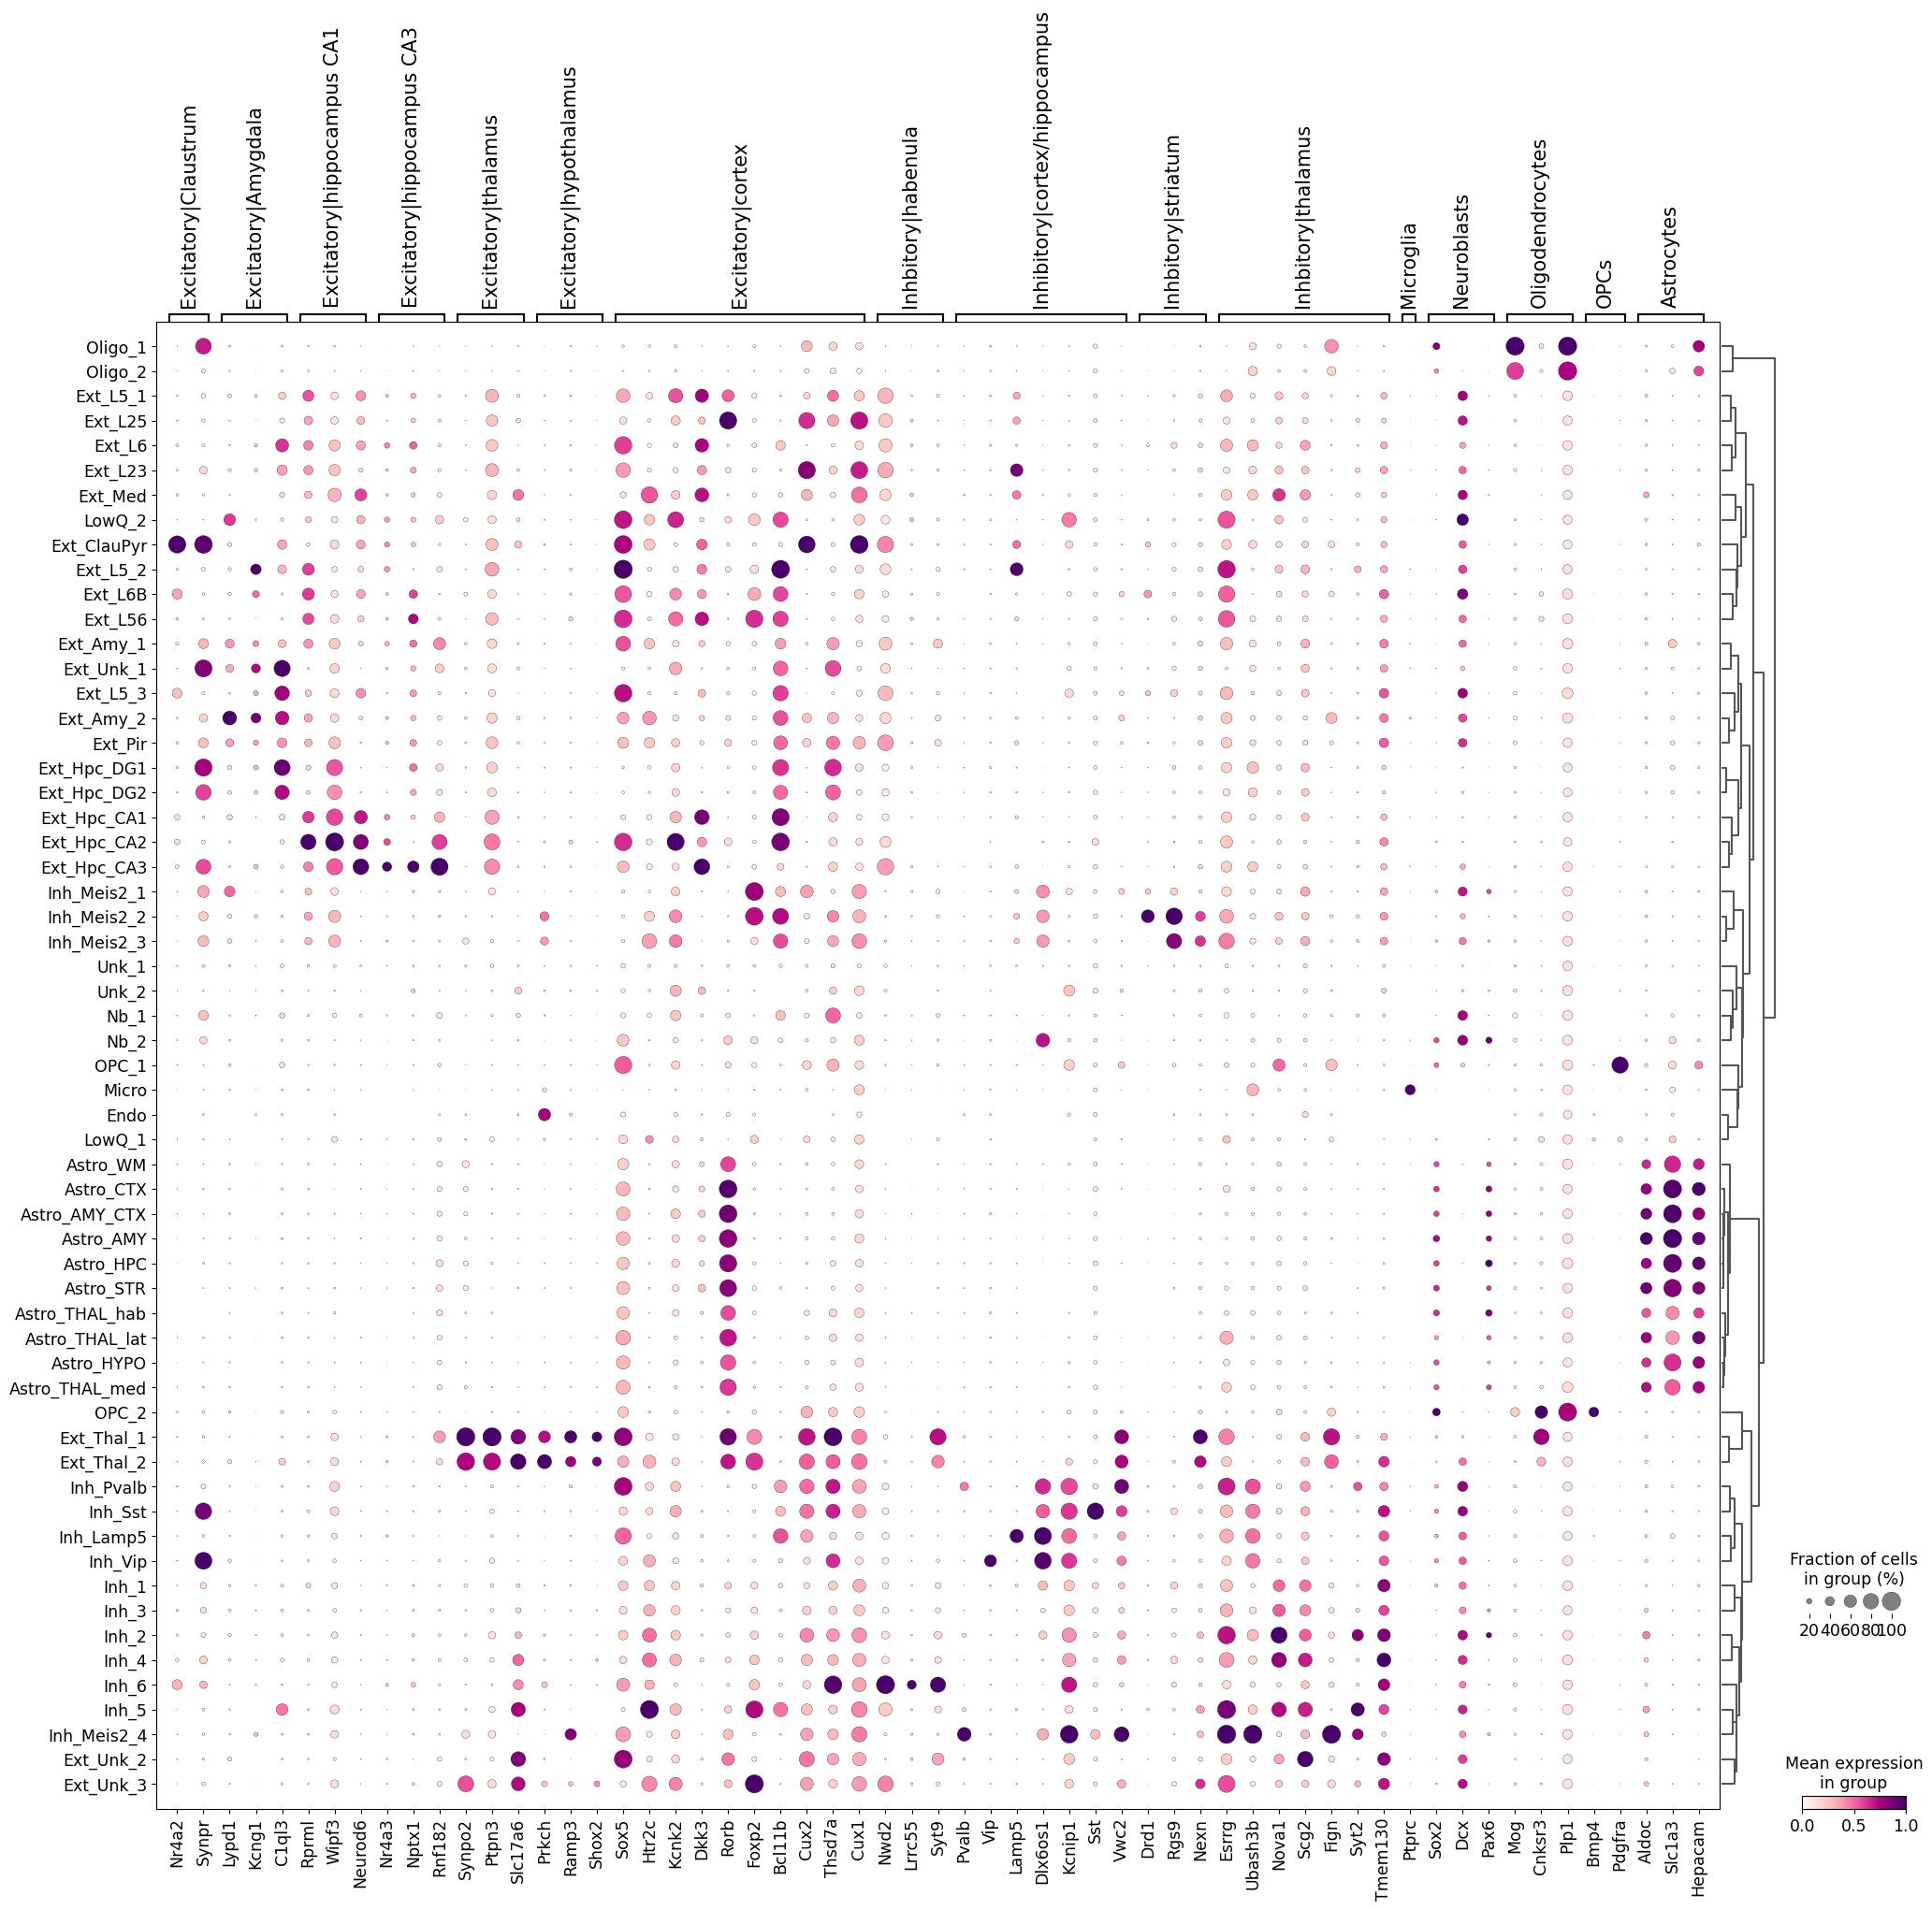

In [19]:
sc_figpath = sc.settings.figdir
reg_path = '/nfs/team205/vk7/sanger_projects/cell2location_paper/notebooks/selected_results/mouse_viseum_snrna/regression_model/RegressionNBV2Torch_65covariates_40532cells_12819genes'
sc.settings.figdir = f'{reg_path}/figures/'

for_plot = adata.copy()
for_plot.raw.X.data = np.log(for_plot.raw.X.data + 1)

gene_list = pd.read_csv(f'{sc.settings.figdir}/20201028_selectMouseRegionMArkers.csv', header=0)
gene_list['Cell_type'] = gene_list['Broad_class'].copy()
gene_list['Cell_type'][gene_list['Neuroglial_class'] == 'Neurones'] = \
(gene_list['Broad_class'] + '|' + gene_list['Region'])[gene_list['Neuroglial_class'] == 'Neurones']

gene_list = {list(gene_list['Cell_type'][gene_list['Cell_type'] == k])[0]: 
             list(gene_list['Marker'][gene_list['Cell_type'] == k]) 
             for k in gene_list['Cell_type'].unique()}
gene_list = {k:list(set(x) & set(for_plot.raw.var["SYMBOL"].tolist())) 
             for k,x in gene_list.items()}
#gene_list = {list(gene_list['Short_Subtype'][gene_list['Subtype'] == k])[0]: 
#             list(gene_list['Genes'][gene_list['Subtype'] == k]) 
#             for k in custom_order}

matplotlib.rc_file_defaults()
rcParams['pdf.fonttype'] = 42 # enables correct plotting of text
with matplotlib.rc_context({'axes.facecolor': 'white', 'font.size': 15}):
    dotplot(for_plot, gene_list, groupby='annotation_1',
                  gene_symbols='SYMBOL', use_raw=True, 
                  dendrogram=True, standard_scale='var', 
            cmap='RdPu',
                  save=f'FigS5_all_cell_type_markers.pdf', show=True);